# Projeto de Disciplina de Algoritmos de Inteligência Artificial para Clusterização

Aluno: Mateus Teixeira Ramos da Silva

### 1. Importar os pacotes e os dados

#### 1.1. Importar os pacotes

In [164]:
# Importar os pacotes
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pkg_resources
import seaborn as sns
import sys
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids

#### 1.2. Importar os dados

In [ ]:
# Importar os dados
dados = pd.read_csv('.\data\country-data.csv', sep=",")

### 2. Infraestrutura

Parte 1. Infraestrutura
1. Você está rodando em Python 3.9+
2. Você está usando um ambiente virtual: Virtualenv ou Anaconda
3. Todas as bibliotecas usadas nesse exercício estão instaladas em um ambiente virtual específico

#### 2.1. Versão do Python e Ambiente Virtual

OBS: caso apareça o erro 'fetch dynamically imported module', basta reiniciar o notebook

In [166]:
print("Versão do Python utilizada:", sys.version)
print("Ambiente virtual:", os.getenv("CONDA_DEFAULT_ENV"))

Versão do Python utilizada: 3.11.10 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 07:22:26) [MSC v.1929 64 bit (AMD64)]
Ambiente virtual: venv_clusterizacao2


#### 2.2. Pacotes instalados

In [167]:
pacotes_instalados = pkg_resources.working_set
for pacote in pacotes_instalados:
    print(f"{pacote.key} == v{pacote.version}")

asttokens == v2.4.1
colorama == v0.4.6
comm == v0.2.2
contourpy == v1.3.0
cycler == v0.12.1
debugpy == v1.6.7
decorator == v5.1.1
exceptiongroup == v1.2.2
executing == v2.1.0
fonttools == v4.54.1
importlib-metadata == v8.5.0
ipykernel == v6.29.5
ipython == v8.29.0
jedi == v0.19.1
joblib == v1.4.2
jupyter-client == v8.6.3
jupyter-core == v5.7.2
kiwisolver == v1.4.7
matplotlib == v3.9.2
matplotlib-inline == v0.1.7
nest-asyncio == v1.6.0
numpy == v1.26.4
packaging == v24.1
pandas == v2.2.3
parso == v0.8.4
pickleshare == v0.7.5
pillow == v11.0.0
pip == v24.2
platformdirs == v4.3.6
prompt-toolkit == v3.0.48
psutil == v5.9.0
pure-eval == v0.2.3
pygments == v2.18.0
pyparsing == v3.2.0
python-dateutil == v2.9.0
pytz == v2024.2
pywin32 == v305.1
pyzmq == v24.0.1
scikit-learn == v1.5.2
scikit-learn-extra == v0.3.0
scipy == v1.14.1
seaborn == v0.13.2
setuptools == v75.1.0
six == v1.16.0
stack-data == v0.6.2
threadpoolctl == v3.5.0
tornado == v6.2
traitlets == v5.14.3
typing-extensions == v4.12.2


### 3. Breve análise exploratória

#### 3.1. Explorar os dados nulos, duplicados do dataset

In [168]:
# Verificar o tamanho geral do dataset e se há duplicadas
print(f"O Dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas.")
print(f"O Dataset possui {dados.duplicated().sum()} linhas duplicadas.")

O Dataset possui 167 linhas e 10 colunas.
O Dataset possui 0 linhas duplicadas.


In [169]:
# Verificar a existência de itens nulos
print(dados.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [170]:
# Análisar um breve resumo estatístco do dataset
dados.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [171]:
# Confirmar se não há dados nulos e quais são os tipos de dados das colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [172]:
# Mostrar as 5 primeiras linhas
dados.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### 3.2. Quantos países existem no dataset?

Parte 2. Escolha de base de dados

2. Quantos países existem no dataset?

Resposta:

Como foi verificado que não existem dados nulos nem duplicados no dataset, utilizou-se o método 'count()'

In [173]:
print(f"Existem {dados['country'].count()} países no Dataset.")

Existem 167 países no Dataset.


#### 3.3. Gráficos sobre a faixa dinâmica das variáveis

Parte 2. Escolha de base de dados

3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

Resposta:

Antes da etapa de clusterização deve-se ainda realizar uma análise exploratória dos dados, afim de verificar se o dataset possui algum dado nulo, duplicado, incorreto ou ainda incompatível com os modelos de clusterização (vale dizer que esses modelos trabalham com dados numéricos).

A análise gráfica realizada no código demonstra a presença de alguns dados cujo valor se encontra bem distante da maioria, o que pode (ou não) representar dados outliers e a necessidade de tratamentos dos mesmos.

A rigor, em razão do dataset apresentar dados de países super e sub desenvolvidos, não se vislumbra o melhor caminho tratar esses dados como outliers, visto que existem países cujo PIB (por exemplo) é alto, e outros cujo PIB é negativo, sendo uma característica inerente deles e não dados nulos e/ou provenientes de erro. Deve-se, todavia, padronizar esses dados, de modo que amenize a diferença entre eles, sem, contudo, substituí-los de nenhuma forma (pela média, mediana, ...).

A padronização tem o intuíto, ainda de deixar os dados compatíveis com os modelos de clusterização que irão ser utilizados.

A exemplo: para a utilização do K-Means, caso os dados possuam uma grande variação de tamanho entre as colunas, deve-se aplicar a padronização dos dados com o “Standart Scaler”.

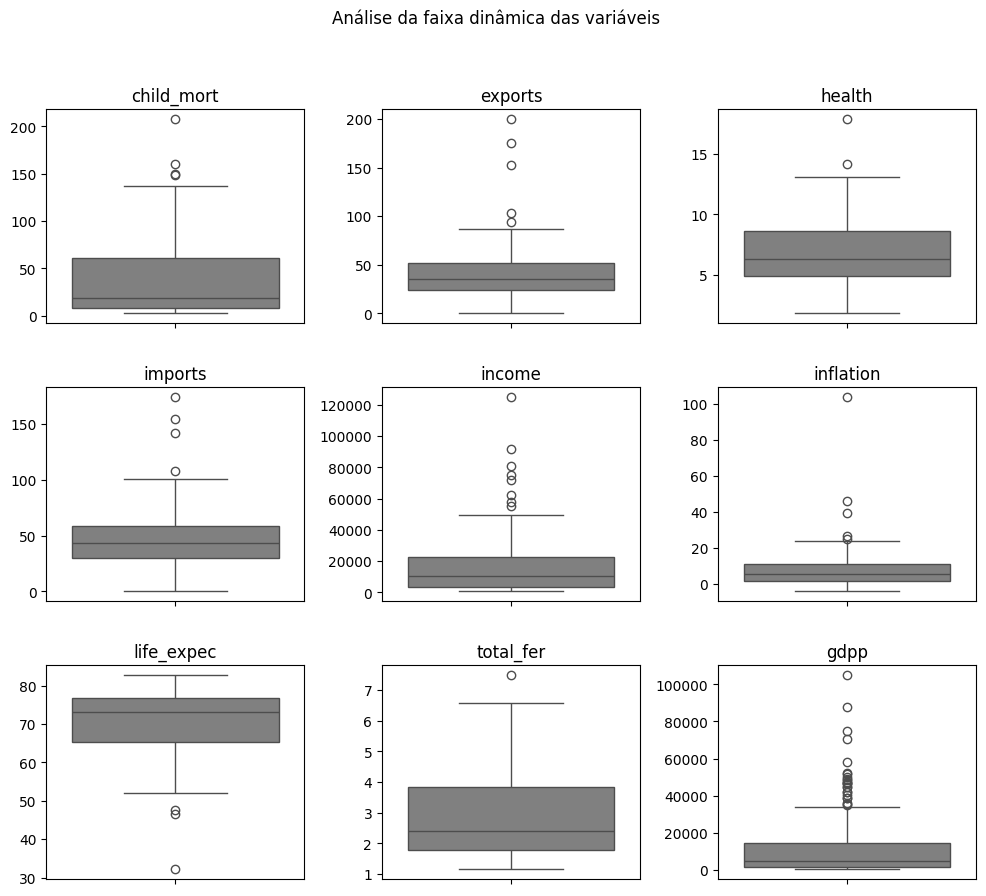

In [174]:
# Selecionar as colunas numéricas
col_num = dados.columns[1:]

# Configurar o plano de fundo dos gráficos 3 x 3
fundo, eixos = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
fundo.suptitle("Análise da faixa dinâmica das variáveis")

eixos = eixos.flatten()

# Plotar os gráficos de cada coluna através de um loop
for i, col, in enumerate(col_num):
    sns.boxplot(data=dados[1:], y=col, ax=eixos[i], color='gray')
    eixos[i].set_title(col)
    eixos[i].set_xlabel('')
    eixos[i].set_ylabel('')

# Configurar o espaçamento para não haver sobreposição
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Exibir o gráfico
plt.show()

A análise pelo histograma demonstra que a maioria dos países do dataset apresentam dados que sugerem tratar-se de países subdesenvolvidos e em desenvolvimento.

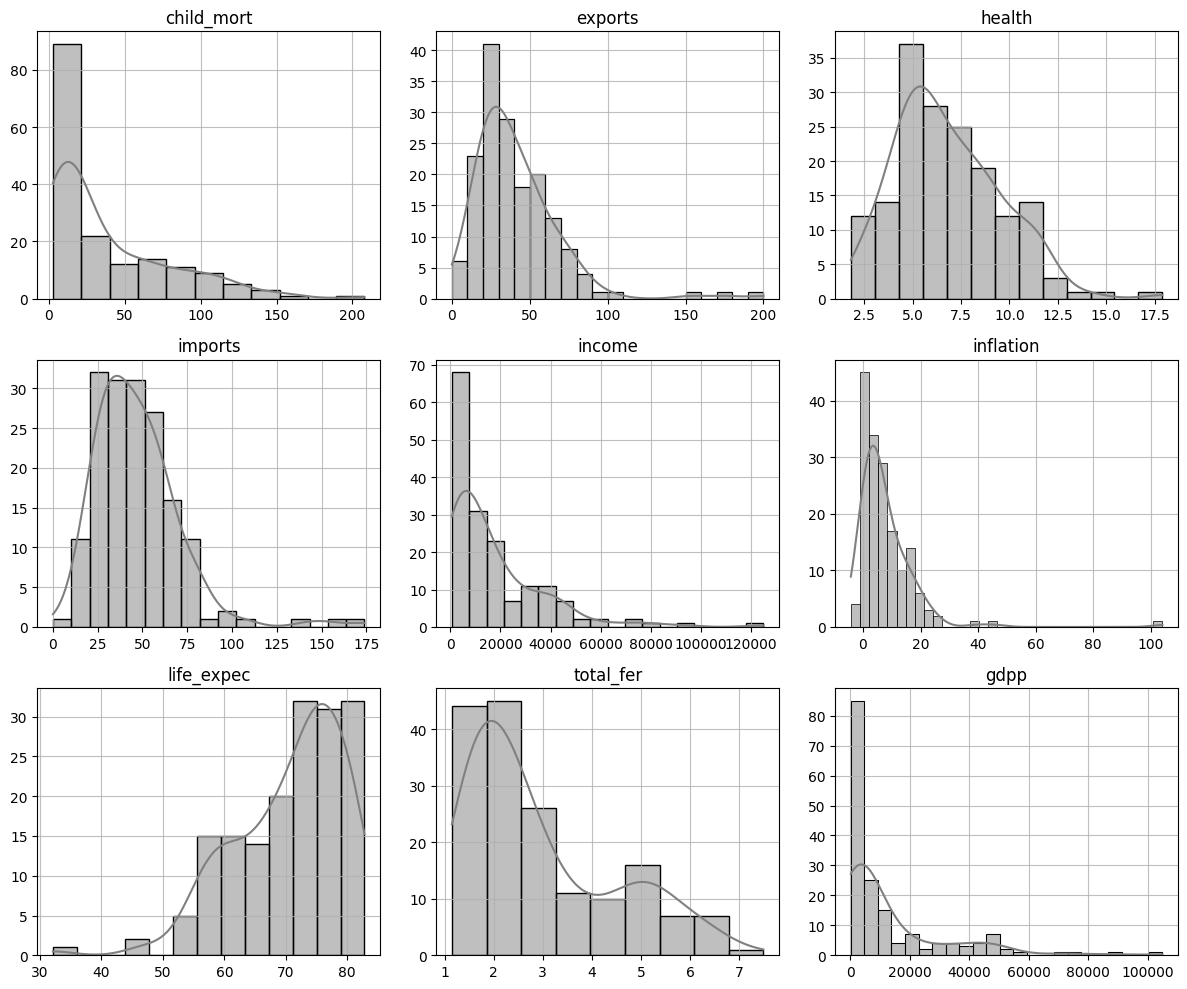

In [ ]:
# Selecionar as colunas numéricas
col_num = dados.columns[1:]

# Configurar o fundo
plt.subplots(nrows=3, ncols=3, figsize=(12,10))

# Plotar os gráficos das colunas numéricas
for i in range(9):
    plt.subplot(3, 3, (i+1))
    sns.histplot(dados[col_num[i]], color='gray', kde=True).set(title=col_num[i])

    plt.xlabel ('')
    plt.ylabel ('')
    plt.grid(True, alpha=0.8)

# Garatir que não haja sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

É possível notar que, ao isolar os 10 países que possuem a expectativa de vida e a renda per capta abaixo do primeiro quarter, já encontramos similaridades entre eles como a República Central Africana, Moçambique e Malawi

In [13]:
maior_mortalidade = dados[dados['life_expec'] < 65].sort_values(by='life_expec', ascending=True)
print("Países com as menores expectativas de vida")
print(maior_mortalidade[['country', 'life_expec']].head(10))

Países com as menores expectativas de vida
                      country  life_expec
66                      Haiti        32.1
87                    Lesotho        46.5
31   Central African Republic        47.5
166                    Zambia        52.0
94                     Malawi        53.1
137              South Africa        54.3
106                Mozambique        54.5
132              Sierra Leone        55.0
64              Guinea-Bissau        55.6
0                 Afghanistan        56.2


In [14]:
maior_inflação = dados[dados['income'] < 2000].sort_values(by='income', ascending=True)
print("Países com as menores rendas per captas")
print(maior_inflação[['country', 'income']].head(10))

Países com as menores rendas per captas
                      country  income
37           Congo, Dem. Rep.     609
88                    Liberia     700
26                    Burundi     764
112                     Niger     814
31   Central African Republic     888
106                Mozambique     918
94                     Malawi    1030
63                     Guinea    1190
150                      Togo    1210
132              Sierra Leone    1220


### 4. K-Means

#### 4.1. Preprocessamento dos dados

In [15]:
# Isolar as colunas numéricas em uma variável própria, sem a necessidade de excluí-la permanentemente do código
dados_numericos = dados.drop(columns='country')

# Configurar o modelo de padronização de dados
scaler = StandardScaler(
                        copy=True,          # valor padrão. assegura que os dados estarão seguros durante a análise
                        with_mean=True,     # valor padrão. aplica (ou não) a média dos dados na formula da padronização
                        with_std=True       # valor padrão. aplica (ou não) o desvio padrão dos dados na formula da padronização
                        )

# Ajustar as configurações do modelo nos dados padronizados
scaler.fit(dados_numericos)

# Padronizar os dados
dados_padronizados = scaler.transform(dados_numericos)

dados_padronizados

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

#### 4.2. Implementar o modelo

In [ ]:
# Configurar o modelo de clusterização dos dados (K-Means)
kmeans = KMeans(
                n_clusters=3,       # número de clusters
                random_state=10     # salva uma 'seed' para assegurar reproduções futuras
                )

# Ajustar as configurações do modelo nos dados padronizados
kmeans.fit(dados_padronizados)

# Atribuir novos dados aos clusters existentes
dados['clusters'] = kmeans.predict(dados_padronizados)

# Substituir os nomes dos clusters para que siga um padrão lógico
dados['clusters'] = dados['clusters'].replace({0: 2, 1: 0, 2: 1})

A substituição do 'nome' dos clusters foi necessária para que ficasse mais legível, de modo que '0' seriam os países menos desenvolvidos e '2' os países mais desenvolvidos

#### 4.3. Análise gráfica do desenvolvimento econômico

Parte 3. Clusterização

2. Para os resultados do K-Médias:

    a. Interprete cada um dos clusters obtidos citando:

    i. Qual a distribuição das dimensões em cada grupo

Resposta:

Como o dataset mostra informações sobre renda per capita e a expectativa de vida, é possível traçar um perfil de desenvolvimento econômico dos países em voga.

Essa análise evidenciou uma relação diretamente proporcional nos parâmetros citados (países que possuem uma média de renda per capta baixa, também possuem uma baixa taxa de expectativa de vida).

Para melhor visualização, nomearam-se os grupos de "Cluster 0", "Cluster 1" e "Cluster 2", respectivamente.

- O “Cluster **0**” evidencia países com **baixa** expectativa de vida e **baixa** renda per capta, cuja condição econômica encontra-se mais vulnerável.

- O “Cluster **1**” evidencia países com uma taxa de expectativa de vida **média**, porém ainda com **baixa** renda per capta, o que podem sugerir tratar-se de países um pouco menos vulneráveis e ainda em desenvolvimento.

- Por fim, o “Cluster **2**” evidencia países com uma **alta** taxa de expectativa de vida e **alta** renda per capta, evidenciando países com economias mais desenvolvidas.

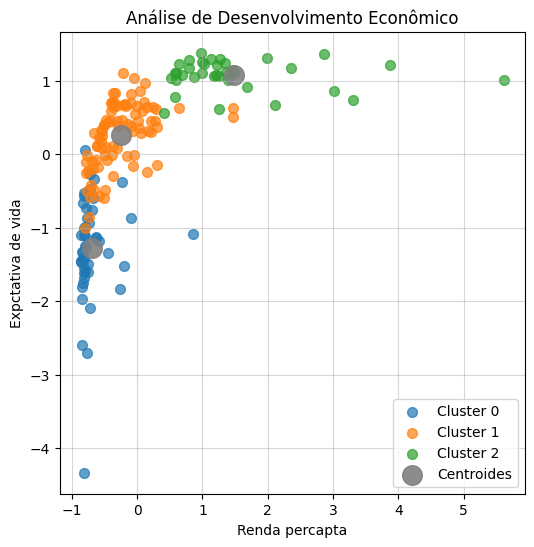

In [17]:
# Definir quais colunas eu quero analisar
eixo_x = 4  # 'renda per capta'
eixo_y = 6  # 'expectativa de vida'

# Plotar o tamanho da imagem
plt.figure(figsize=(6, 6))

# Plotar os dados
for cluster_num in range(3):
    plt.scatter(
                dados_padronizados[dados['clusters'] == cluster_num, eixo_x],
                dados_padronizados[dados['clusters'] == cluster_num, eixo_y],
                label=f"Cluster {cluster_num}",        
                s=50,
                alpha=0.7
                )

# Definir os centroides
centro_kmeans = kmeans.cluster_centers_

# Plotar os centroides
plt.scatter(
            centro_kmeans[:, eixo_x], 
            centro_kmeans[:, eixo_y], 
            label='Centroides',
            color='gray', 
            s=200, 
            alpha=0.9
            )

# Configurações do gráfico
plt.title("Análise de Desenvolvimento Econômico")
plt.xlabel("Renda percapta")
plt.ylabel("Expctativa de vida")

plt.grid(visible=True, alpha=0.5)
plt.legend(loc='best')

# Mostrar o gráfico
plt.show()

#### 4.3.1. Análise por tabela

Para uma visualização mais técnica, foi feito uso de uma tabela

Com isso é possível verificar que os países do 'Cluster 0' tem:

   - a taxa de mortalidade **alta** (acima da média);
   - a renda per capta **baixa** (abaixo da média);
   - a expectativa de vida **baixa** (abaixo da média);
   - o 'PIB' **baixo** (abaixo da média)

Tudo corroborando para a conclusão de que o modelo de clusterização isolou neste grupo os países subdesenvolvidos

Ao analisar cada um dos clusters, é possível verificar a seguinte distribuição entre os países:

- a maioria dos países do "Cluster 0" pertencem aos continentes
- - 78.72% Africano (centro e sul),
- - 19.15% Asiático (sul, sudeste e ásia ocidental) e
- -  2.13% América do Norte (apenas o Haiti);

- a maioria dos países do "Cluster 1" pertencem aos continentes 
- - 35.00% Asiático (sul, sudeste e centro),
- - 22.50% Europeu (europa oriental, sudeste, cáucaso e eurásia),
- - 16.25% América do Norte, 
- - 13.75% América do Sul,
- - 10.00% Africano (norte) e
- -  6.25% Oceania;

- a maioria dos países do "Cluster 2" pertencem aos continentes 
- - 65.71% Europeu (europa ocidental, norte, sul e centro), 
- - 25.71% Asiático (sudeste, leste e ásia ocidental), 
- -  5.71% Oceania (Austrália e Nova Zelândia) e 
- -  5.71% América do Norte (Canadá e EUA);

In [18]:
dados[(dados['clusters'] == 0)].head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0


In [19]:
dados[(dados['clusters'] == 1)].head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1


In [20]:
dados[(dados['clusters'] == 2)].head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2


In [21]:
print("Relembrando as médias de cada coluna")
pd.DataFrame(dados.iloc[:, 1:10].mean()).T

Relembrando as médias de cada coluna


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,38.27006,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689


#### 4.3.2. Países que mais representam a clusterização da análise econômica

Parte 3. Clusterização

2. Para os resultados do K-Médias:

    a. Interprete cada um dos clusters obtidos citando:

    ii. O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.

Resposta:

Para localizar os países que melhor representam os clusters do agrupamento realizados, considerando que temos três clusters, devemos localizar aqueles cuja distância mais se aproxima do centroide, razão pela qual passará a ser o melhor representante daquele cluster. Para isso, usamos o método 'Pairwise Distances' para encontrar o ponto mais próximo entre dois conjuntos de dados (no caso, o dado e o cluster).

Dito isso, os países que melhor representam:

- O ‘Cluster **0**’ é Guinea (com 'PIB' e renda percapta **baixos**, denotando ser um país subdesenvolvido),
- O ‘Cluster **1**’ é Jamaica (com 'PIB' e renda percapta **médios**, denotando ser um país ainda em desenvolvimento) e
- O ‘Cluster **2**’ é Iceland (com **alto** 'PIB' e **alta** renda percapta, denotando ser um país desenvolvido).

O cálculo de proximidade foi realizado usando os dados gerais e os clusters e foram selecionados por serem os países que mais se aproximam do centroide dos clusters. Porém, a interpretação feita levou em consideração os dados de expectativa de vida e renda per capta para melhor compreensão, visto que se trata de um dataset multidimensional (com nove colunas numéricas).


In [22]:
# Encontrar o país mais próximo de cada centróide

    # X é o primeiro conjunto de pontos que quero comparar, no caso os centroides
    # Y é o segundo conjunto de pontos que quero comparar, no caso o dataset numérico

mais_proximo, distancia = pairwise_distances_argmin_min(X=centro_kmeans, Y=dados_padronizados)

# Mapear o país mais próximo de cada centróide
melhor_pais = dados.iloc[mais_proximo]

print("Países que melhor representam cada agrupamento:")
melhor_pais.sort_values(by='clusters')

Países que melhor representam cada agrupamento:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
63,Guinea,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648,0
76,Jamaica,18.1,31.3,4.81,49.6,8000,9.81,74.7,2.17,4680,1
68,Iceland,2.6,53.4,9.40,43.3,38800,5.47,82.0,2.20,41900,2


### 5. KMedoids

Parte 4. Escolha dos algoritmos

2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

Resposta

Para garantir que o baricentro do cluster seja, necessariamente, o dado presente no dataset que mais se aproxima do centroide, utilizaremos o modelo K-Medoid com o método de inicialização de 'k-medoid++' que calcula qual o dado que mais se aproxima do centroide do K-Means. Com isso, substituímos os centroides pelos medóides.

Esse método foi utilizada por ser a mais compatível com a métrica de 'k-means ++' (padrão do K-Means), levando a resultados mais parecidos. Também foi utilizada a mátrica 'euclidiana' de cálculo de distância, garantindo compatibilidade com o K-Means.

Como se observa o modelo do 'K-Medoid' se diferencia do método do Pariwise Distances por conta das otimizações presentes no algoritmo, ao passo em que o Pairwise realiza um cálculo simples dos dados em relação ao centroide, sem nenhuma otimização. Nesse sentido, o K-Medoid seria mais robusto sobre a varredura dos dados.

#### 5.1. Implementar o modelo

In [ ]:
# Configurar o modelo de clusterização dos dados (K-Medoid)
kmedoids = KMedoids(
                    n_clusters=3,           # número de clusters
                    init='k-medoids++',     # método de inicialização da análise ('k-medoids++' seguirá forma do 'kmeans++')
                    metric='euclidean',     # métrica de cálculo da distância
                    random_state=7          # salva uma 'seed' para assegurar reproduções futuras
                    )

# Ajustar as configurações do modelo nos dados padronizados
kmedoids.fit(dados_padronizados)

# Atribuir novos dados aos clusters existentes
kmedoids.predict(dados_padronizados)

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

#### 5.2. Análise por tabela

In [24]:
# Nomear os medoids
dados['medoides'] = kmedoids.labels_

# Isolar os indices dos países medoides
indices = kmedoids.medoid_indices_

# Imprimir em forma de tabela
melhor_pais = dados.iloc[indices]
melhor_pais[['country', 'clusters', 'medoides']].sort_values(by='medoides')

,country,clusters,medoides
147,Tanzania,0,0
152,Tunisia,1,1
53,Finland,2,2


#### 5.3. Análise por gráfico

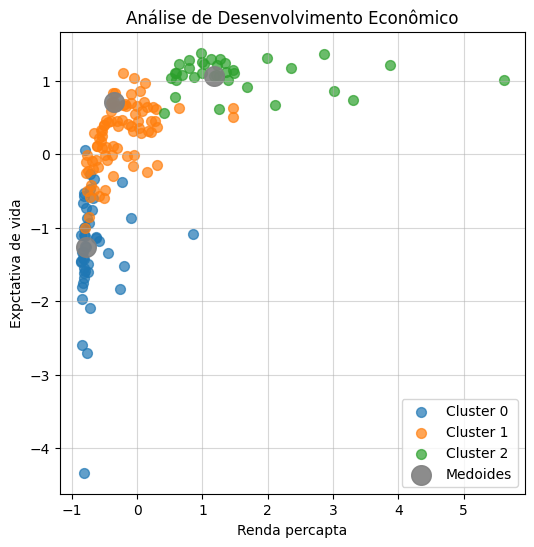

In [25]:
# Definir quais colunas eu quero analisar
eixo_x = 4 # 'renda per capta'
eixo_y = 6 # 'expectativa de vida'

# Plotar o tamanho da imagem
plt.figure(figsize=(6, 6))

# Plotar os dados
for cluster_num in range(3):
    plt.scatter(
                dados_padronizados[dados['clusters'] == cluster_num, eixo_x],
                dados_padronizados[dados['clusters'] == cluster_num, eixo_y],
                label=f"Cluster {cluster_num}",        
                s=50,
                alpha=0.7
                )

# Definir os centroides
centro_kmedoids = kmedoids.cluster_centers_

# Plotar os centroides
plt.scatter(
            centro_kmedoids[:, eixo_x], 
            centro_kmedoids[:, eixo_y], 
            label='Medoides',
            color='gray', 
            s=200, 
            alpha=0.9
            )

# Configurações do gráfico
plt.title("Análise de Desenvolvimento Econômico")
plt.xlabel("Renda percapta")
plt.ylabel("Expctativa de vida")

plt.grid(True, alpha=0.5)
plt.legend(loc='best')

# Mostrar o gráfico
plt.show()

### 6. Clusterização hierárquica (H-Cluster)

#### 6.1. Explorar os dados

In [26]:
dados.iloc[:, [1, 3]]

,child_mort,health
0,90.2,7.58
1,16.6,6.55
2,27.3,4.17
3,119.0,2.85
4,10.3,6.03
...,...,...
162,29.2,5.25
163,17.1,4.91
164,23.3,6.84
165,56.3,5.18


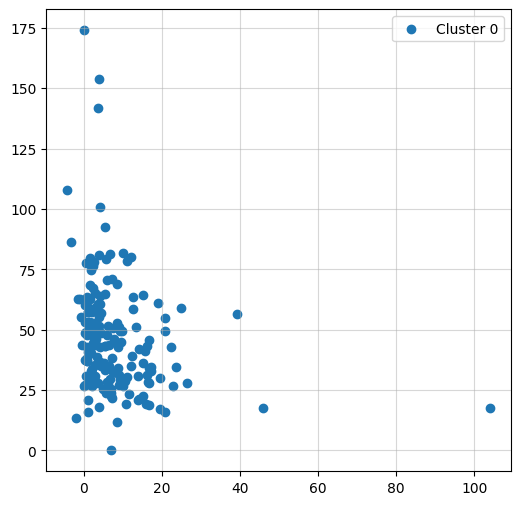

In [113]:
coluna_x = 6    # 'renda per capta'
coluna_y = 4    # 'expectativa de vida'

dados_exp = dados.iloc[:, [coluna_x, coluna_y]].values

plt.figure(figsize=(6, 6))

plt.scatter(dados_exp[:,0], dados_exp[:,1], label='Cluster 0')

plt.grid(visible=True, alpha=0.5)
plt.legend(loc='best')

# Mostrar o gráfico
plt.show()

#### 6.2. Preprocessamento dos dados (MinMaxScaler)

In [28]:
# Definir as nomenclaturas dos modelos

# Configurar o modelo de padronização dos dados
min_max_scaler = MinMaxScaler()

# Ajustar e aplicar a formula de padronização
dados_t = min_max_scaler.fit_transform(dados_numericos)

dados_t[[4, 6]]

array([[0.03748783, 0.22707876, 0.2622747 , 0.33825512, 0.14865223,
        0.05221329, 0.8816568 , 0.15457413, 0.11424181],
       [0.07546251, 0.10351141, 0.16096955, 0.26006459, 0.04896657,
        0.11071066, 0.81262327, 0.0851735 , 0.02852943]])

In [29]:
dist_matrix = pairwise_distances(dados_t, dados_t)
print(dist_matrix)

[[0.         0.85938446 0.74311097 ... 0.8546914  0.40426303 0.22412638]
 [0.85938446 0.         0.2957055  ... 0.31085967 0.58498839 0.84241764]
 [0.74311097 0.2957055  0.         ... 0.41013299 0.38283615 0.69477761]
 ...
 [0.8546914  0.31085967 0.41013299 ... 0.         0.59790897 0.81790284]
 [0.40426303 0.58498839 0.38283615 ... 0.59790897 0.         0.36781892]
 [0.22412638 0.84241764 0.69477761 ... 0.81790284 0.36781892 0.        ]]


#### 6.3. Implementar o modelo

In [30]:
# Configurações do modelo
hcluster1 = AgglomerativeClustering(
                                distance_threshold=0,   # limite de distência de aglomeração
                                metric='euclidean',     # métrica euclidiana, equivalente ao 'k-means++'
                                n_clusters=None         # número de clusters
                                )

# Ajustar as configurações do modelo nos dados
hcluter1 = hcluster1.fit(dados_numericos)

#### 6.4. Análise do Dendrograma

Parte 3. Clusterização

3. Para os resultados de Clusterização Hierárquica, apresente o dendrograma e interprete os resultados.

Resposta:

Para melhor visualização, foi inserida uma linha pontilhada em cada interseção dos valores, calculada a distância euclidiana das maiores interseções e, ainda, apresentado o número de dados presentes em cada nível de clusterização.

Em breve análise, podemos ver que o número com maior distância, que não seja a interseção do topo (para um grupo único) seria a de quatro clusters, cujo resultado se deu por “60.578,58”, diferente do número de clusters proposto (três), que se deu por “34.751,23”. O que, possivelmente seria o número otimizado de clusters para os dados apresentados.

Isso revela que tal análise não é decisiva para determinar o número ótimo de clusters, visto que analisando os dados com quatro clusters percebe-se que eles se encontram muito agrupados, quase em um cluster único.

A análise dos gráficos pelo K-Means, sem aplicar nenhuma técnica de redução, também revela dados bem próximos, denotando a necessidade de uma técnica de redução de dimensionalidade para melhor análise.

In [31]:
# Plotar o dendrograma
def plot_dendrogram(model, top_n=4, **kwargs):
    
    # Inicializa a contagem de elementos (países) em cada nó
    n_samples = len(model.labels_)
    counts = np.zeros(model.children_.shape[0])
    
    # Conta o número de elementos para cada nó
    for i, merge in enumerate(model.children_):
        # Verifica o primeiro filho
        if merge[0] < n_samples:
            count_1 = 1  # Conta 1 se o valor não está entre parênteses
        else:
            count_1 = counts[merge[0] - n_samples]  # Soma o valor acumulado se está entre parênteses

        # Verifica o segundo filho
        if merge[1] < n_samples:
            count_2 = 1  # Conta 1 se o valor não está entre parênteses
        else:
            count_2 = counts[merge[1] - n_samples]  # Soma o valor acumulado se está entre parênteses

        # A contagem do cluster atual é a soma das contagens dos filhos
        counts[i] = count_1 + count_2

    # Cria a matriz de linkage com as contagens corretas
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Identifica as 4 maiores distâncias e desenha linhas vermelhas
    maiores_distancias = sorted(model.distances_)[-top_n:]
    maiores_distancias = sorted(maiores_distancias, reverse=True)

    for i, altura in enumerate(maiores_distancias):
        # Desenha a linha vermelha
        plt.axhline(y=altura, color='red', linestyle='--', linewidth=1)
        
        # Exibe a distância e a contagem de clusters
        if i < len(maiores_distancias) - 1:
            next_altura = maiores_distancias[i + 1]
            distancia_linhas = altura - next_altura
            meio = (altura + next_altura) / 2

            # Calcula o número de clusters entre essa linha e a próxima
            cluster_count = np.sum(model.distances_ >= altura) + 1  # +1 para incluir o cluster atual

            # Exibe a distância e a contagem de clusters
            plt.text(x=1, y=meio, s=f"Distância: {distancia_linhas:,.2f}", 
                     ha='left', va='center', color='red')

    # Plota o dendrograma
    dendro = dendrogram(linkage_matrix, **kwargs)

    # Adiciona a quantidade de dados em cada nó
    plt.text(x=70, y=(maiores_distancias[0] - 10000), s="(167)", ha='center', va='center', color='black')
    plt.text(x=110, y=(maiores_distancias[1] - 10000), s="(143)", ha='center', va='center', color='black')
    plt.text(x=30, y=(maiores_distancias[2] - 10000), s="(24)", ha='center', va='center', color='black')
    plt.text(x=50, y=(maiores_distancias[3] - 10000), s="(20)", ha='center', va='center', color='black')
    plt.text(x=13, y=(maiores_distancias[3] - 15000), s="(4)", ha='center', va='center', color='black')
    plt.text(x=130, y=(maiores_distancias[3] - 16000), s="(35)", ha='center', va='center', color='black')
    plt.text(x=90, y=(maiores_distancias[3] - 22000), s="(108)", ha='center', va='center', color='black') 


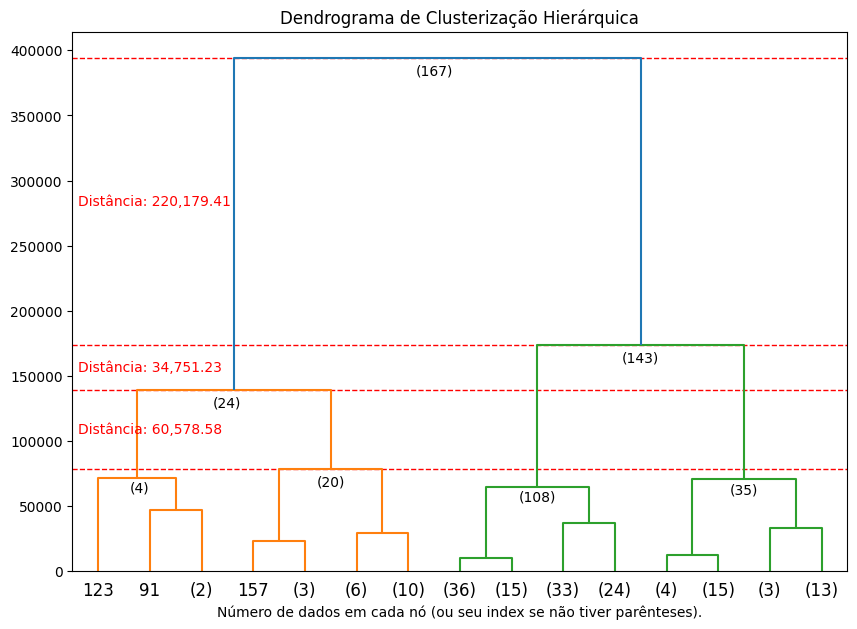

In [32]:
# Configuração da figura
plt.figure(figsize=(10, 7))
plt.title('Dendrograma de Clusterização Hierárquica')
plot_dendrogram(hcluster1, truncate_mode='level', p=3)
plt.xlabel("Número de dados em cada nó (ou seu index se não tiver parênteses).")
plt.show()



#### 6.5. Proposta com 4 clusters

Como se vê, embora tenha sido o número que melhor representaria a distância entre os clusters, o agrupamento com 4 clusters tornou a análise ainda mais dificultosa, especialmente sem utilizar nenhuma técnica de redução de dimensionalidade.

In [138]:
n_cluster2 = 4
hcluster2 = AgglomerativeClustering(n_clusters=n_cluster2, 
                                  metric='euclidean', 
                                  linkage='ward'
                                  )
cluster_label = hcluster2.fit_predict(dados_numericos)

In [119]:
hcluster2.labels_

array([2, 2, 2, 2, 3, 3, 2, 0, 0, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2,
       3, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       0, 2, 2, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2,
       2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 0, 2, 2, 3, 2, 2,
       2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 3, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 2, 3,
       2, 0, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 0, 0, 0, 3, 2, 2, 3, 2, 2, 2], dtype=int64)

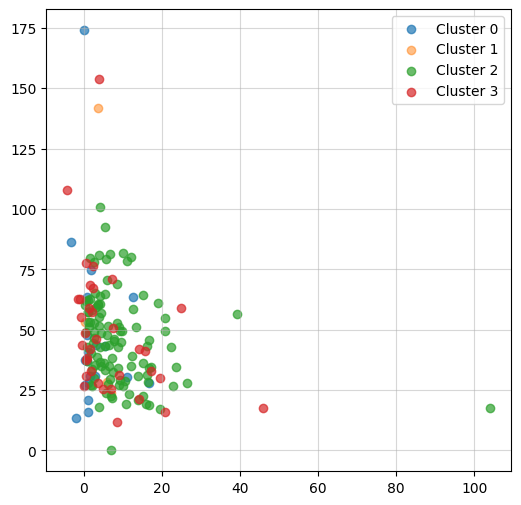

In [142]:
# Plotar o novo gráfico (precisa da execução do 5.1)
coluna_x = 6    # 'renda per capta'
coluna_y = 4    # 'expectativa de vida'

dados['h_cluster2'] = cluster_label

h_dados1 = dados[dados.h_cluster2 == 0].iloc[:, [coluna_x, coluna_y]].values
h_dados2 = dados[dados.h_cluster2 == 1].iloc[:, [coluna_x, coluna_y]].values
h_dados3 = dados[dados.h_cluster2 == 2].iloc[:, [coluna_x, coluna_y]].values
h_dados4 = dados[dados.h_cluster2 == 3].iloc[:, [coluna_x, coluna_y]].values

plt.figure(figsize=(6, 6))

plt.scatter(h_dados1[:,0], h_dados1[:,1], alpha=0.7, label=f'Cluster 0')
plt.scatter(h_dados2[:,0], h_dados2[:,1], alpha=0.5, label=f'Cluster 1')
plt.scatter(h_dados3[:,0], h_dados3[:,1], alpha=0.7, label=f'Cluster 2')
plt.scatter(h_dados4[:,0], h_dados4[:,1], alpha=0.7, label=f'Cluster 3')

#for i in set(hcluster2.labels_):
    # Plotar os dados
#plt.scatter(dados_exp[:,0], dados_exp[:,1], c=hcluster2.labels_, cmap='rainbow', label=f'Cluster {i}')

plt.grid(visible=True, alpha=0.5)

plt.legend(loc='best')

# Mostrar o gráfico
plt.show()

### 7. DBScan

#### 7.1. Implementar o modelo

In [35]:
# Configurar o modelo de clusterização dos dados (DBSCAN)
dbscan = DBSCAN(
                eps=1.2,                # tamanho do raio de busca
                min_samples=4,          # número mínimo de dados vizinhos que o raio tem que alcançar para ser agrupado
                metric = 'euclidean',   # valor padrão. método de cálculo das distâncias dos dados
                p=2                     # potência para as métricas da fórmula de distância Minkowski (2 para Euclidiana)
                )

# Ajustar as configurações do modelo nos dados padronizados
dbscan.fit(dados_padronizados)

pontos_centrais = np.zeros_like(dbscan.labels_, dtype=bool)
pontos_centrais[dbscan.core_sample_indices_] = True

db_labels = dbscan.labels_

n_cluster3 = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)

# Adicionar uma coluna no dataset
dados['db_clusters'] = db_labels

In [112]:
dados.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,medoides,db_clusters,hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,-1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1,1,0


#### 7.2. Análise gráfica

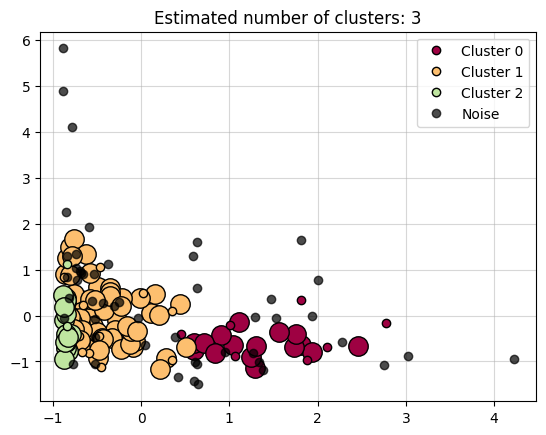

In [111]:
# Plotar um gráfico

labels_unicas = set(db_labels)
cores = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(labels_unicas))]

for i, ruido_cor in zip(labels_unicas, cores):
    
    # se for ruído,será preto
    if i == -1:
        ruido_cor = [0, 0, 0, 1]
    
    pontos_cluster = (db_labels == i)

    xy = dados_padronizados[pontos_cluster & pontos_centrais]
    plt.plot(xy[:, 0], xy[:, 1], 'o', 
             markerfacecolor=tuple(ruido_cor),
             markeredgecolor='k', 
             markersize=14)

    xy = dados_padronizados[pontos_cluster & ~pontos_centrais]
    if i == -1:
        plt.plot(xy[:, 0], xy[:, 1], 'o', 
                markerfacecolor=tuple(ruido_cor),
                markeredgecolor='k', 
                markersize=6,
                alpha=0.7,
                label=f'Noise')
    
    else:
        plt.plot(xy[:, 0], xy[:, 1], 'o', 
             markerfacecolor=tuple(ruido_cor),
             markeredgecolor='k', 
             markersize=6,             
             label=f'Cluster {i}')
    
plt.title('Estimated number of clusters: %d' % n_cluster3)
plt.grid(visible=True, alpha=0.5)
plt.legend(loc='best')
plt.show()

### 8. Testes de Acurácia

Os testes de acurárcia demonstraram que há uma grande similaridade entre o K-Means e o K-Medoid, visto que ambos seguem o método de inicialização do 'kmeans++' e a métrica euclidiana.

A acurácia naturalmente cai, quando comparado ao DBSCAN, visto que ele classifica os possíveis outliers (noise) como '-1', 'cluster' que não existe no K-Means e no K-Medoid.

Para o HCluster, foi necessário impelmentá-lo com o número de clusters igual a 3, de modo a igualar as comparações. Mesmo assim, percebe-se uma acurácia menor.

In [ ]:
n_cluster3 = 3
hcluster3 = AgglomerativeClustering(n_clusters=n_cluster3, 
                                  metric='euclidean', 
                                  linkage='ward'
                                  )
cluster_label2 = hcluster3.fit_predict(dados_numericos)

dados['hcluster'] = cluster_label2

# Substituir os nomes dos clusters para que siga um padrão lógico
dados['hcluster'] = dados['hcluster'].replace({0: 2, 1: 0, 2: 1})

In [79]:
print(f"Acurácia entre K-Means e K-Medoids: {(100 * (metrics.accuracy_score(dados['clusters'], dados['medoides']))):,.2f}%")
print(f"Acurácia entre K-Means e DBSCAN: {(100 * (metrics.accuracy_score(dados['clusters'], dados['db_clusters']))):,.2f}%")
print(f"Acurácia entre K-Means e HCluster: {(100 * (metrics.accuracy_score(dados['clusters'], dados['hcluster']))):,.2f}%")
print(f"Acurácia entre DBSCAN e HCluster: {(100 * (metrics.accuracy_score(dados['db_clusters'], dados['hcluster']))):,.2f}%")

Acurácia entre K-Means e K-Medoids: 93.41%
Acurácia entre K-Means e DBSCAN: 65.87%
Acurácia entre K-Means e HCluster: 52.10%
Acurácia entre DBSCAN e HCluster: 40.12%
